## < EDA : Price >

Our target variable for Regression analysis is 'price'. 
We also want to get a general idea of rentals in NYC, depending on locations.

In [6]:
# Import packages

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset

df = pd.read_csv("~/Desktop/AirBnbNYC2019.csv") 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Calcculate the overall price mean in NYC

df["price"].mean()

152.7206871868289

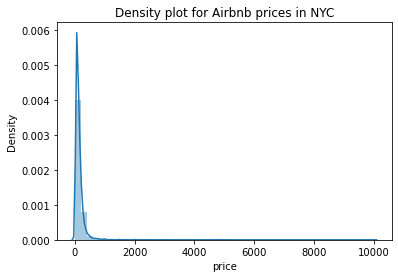

In [7]:
# Visualize the overall price in NYC with a densityplot

import seaborn as sn

sn.distplot(df['price'])
plt.xlabel('price')
plt.title('Density plot for Airbnb prices in NYC')
plt.show()

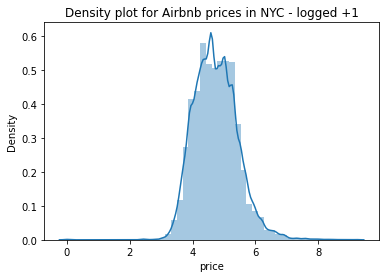

In [8]:
# Normalize the positively skewed distribution

sns.distplot(np.log(df['price']+1))
plt.xlabel('price')
plt.title('Density plot for Airbnb prices in NYC - logged +1')
plt.show()

In [9]:
# Calculate 'Price' averages for each neighbourhood_group

grouped_df = df.groupby("neighbourhood_group")
mean_df2 = grouped_df['price'].mean()
mean_df2 = mean_df2.reset_index()
mean_df2

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


In [10]:
# Visualize the above mean with geographical distribution

import pandas as pd
import folium

m2 = folium.Map(location=[40.693943, -73.985880], zoom_start=10, tiles='cartodbpositron', width=640, height=480)

folium.CircleMarker(location=[40.748817, -73.985428], radius=19.6875814, popup='Manhattan', 
                    color='#a51212', fill_color='#a51212', fill=True).add_to(m2)
folium.CircleMarker(location=[40.650002, -73.949997], radius=12.43832073, popup='Brooklyn', 
                    color='#edda07', fill_color='#edda07', fill=True).add_to(m2)
folium.CircleMarker(location=[40.861706, -73.880341], radius=8.7496792, popup='Bronx', 
                    color='#094ad7', fill_color='#094ad7', fill=True).add_to(m2)
folium.CircleMarker(location=[40.743204, -73.815265], radius=9.9517649, popup='Queens', 
                    color='#620594', fill_color='#620594', fill=True).add_to(m2)
folium.CircleMarker(location=[40.606829, -74.141636], radius=11.4812332, popup='Staten Island', 
                    color='#139405', fill_color='#139405', fill=True).add_to(m2)


m2

We notice that the price distribution plot has strong positive skewness. Normarized it by taking the log then adding 1.

From the plots and the calculations of mean above, we found that the overall price mean in NYC is $152 per night, as well as the price means of each borough as below;

    1. Manhattan ($197)
    
    2. Brooklyn ($124)
    
    3. Staten Island ($115)
    
    4. Queens ($99)
    
    5. Bronx ($87)